Forma de X: (100, 2)
Parámetros ajustados (beta): [4.21509616 2.54022677]


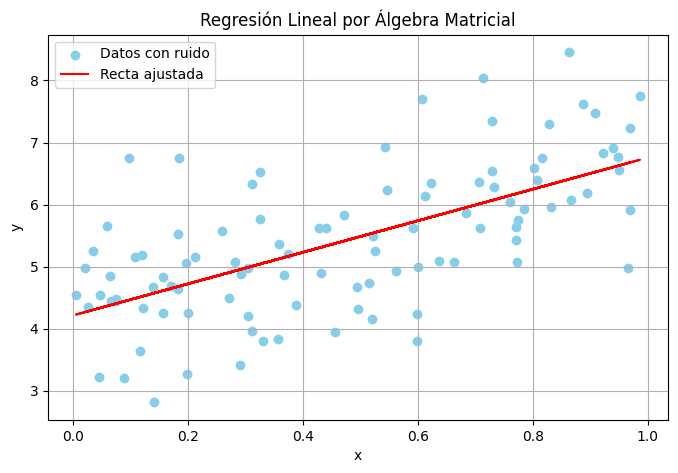

In [1]:
# importamos las librerias necesarias:

import numpy as np
import matplotlib.pyplot as plt

# Fijar semilla para que todos tengamos los mismos resultados:
np.random.seed(42)

def generar_datos(n=100):
    """
    Genera datos sintéticos para regresión lineal con ruido.

    Args:
        n (int): número de puntos a generar.

    Returns:
        x (np.array): variable independiente (forma n x 1)
        y (np.array): variable dependiente con ruido (n x 1)
    """
    x = np.random.rand(n, 1)
    y = 4 + 3 * x + np.random.randn(n, 1)
    return x, y

def ajustar_modelo(x, y):
    """
    Ajusta el modelo de regresión lineal usando álgebra matricial.

    Args:
        x (np.array): matriz de características
        y (np.array): vector de salida

    Returns:
        beta (np.array): parámetros ajustados del modelo
    """
    n = x.shape[0]
    X = np.hstack((np.ones((n, 1)), x))  # columna de unos + x

    print("Forma de X:", X.shape)

    Xt = X.T
    XtX = Xt @ X

    try:
        XtX_inv = np.linalg.inv(XtX)
    except np.linalg.LinAlgError:
        print("La matriz XᵀX no es invertible")
        return None

    beta = XtX_inv @ Xt @ y
    return beta

def graficar_resultado(x, y, beta):
    """
    Grafica los datos y la recta ajustada.

    Args:
        x (np.array): entrada original
        y (np.array): valores observados
        beta (np.array): parámetros del modelo
    """
    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, color="skyblue", label="Datos con ruido")

    y_pred = beta[0] + beta[1] * x
    plt.plot(x, y_pred, color="red", label="Recta ajustada")

    plt.title("Regresión Lineal por Álgebra Matricial")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.show()

# --- Ejecución del sistema ---
x, y = generar_datos(100)
beta = ajustar_modelo(x, y)

if beta is not None:
    print("Parámetros ajustados (beta):", beta.flatten())
    graficar_resultado(x, y, beta)
else:
    print("No se pudo calcular el modelo")

# Regresión Lineal con Álgebra Matricial

En esta actividad se implementó una regresión lineal simple usando álgebra matricial, aplicando la fórmula:

**β = (XᵀX)^(-1) Xᵀy**

Donde:
- **X** es la matriz de diseño (una columna de unos + los valores de entrada).
- **y** es el vector de etiquetas (valores observados).
- **β** contiene los parámetros ajustados: intercepto y pendiente.

Se generaron datos sintéticos con ruido gaussiano, y luego se ajustó el modelo utilizando únicamente operaciones matriciales con NumPy. Finalmente, se graficaron los datos y la recta resultante.

Esta técnica es fundamental porque:
- Es la base matemática de muchos modelos de Machine Learning.
- Permite comprender el papel de las matrices en la optimización de parámetros.
- Es eficiente computacionalmente para problemas lineales.

Además, se practicaron operaciones como transpuesta, multiplicación, y cálculo de inversas de matrices.